# Imports and Custom Functions writen for convenience

## Importing Libraries

In [1]:
from BM25_2 import BM25
from metrices import *
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

## Custom Functions and Location of data folder

In [2]:
loc = "../refining_seriously/"
def namestr(obj, namespace = globals()):
    return [name for name in namespace if namespace[name] is obj][0]


def print_json(query, n = 3, m = 5, k=6):
    n = 3
    print(f"{namestr(query)} = "+"{\n", end="")  # start of the json
    l = sorted(list(query.keys()),
            key=lambda x: int(x[k:]))
    for QID in l[:n]:
        print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
    for i in range(2):
        print("\t...")
    for QID in l[-n:]:
        print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
    print("}")  # end of the json

## Importing Data

In [3]:
# "cases.json" has the query and the doc_id of the relevant documents
with open(loc+"cases.json") as f:
    prior_cases = json.load(f)
print_json(prior_cases, k=1)

prior_cases = {
	"C1": ['masud', 'khan', 'v', 'state', 'uttar', ......],
	"C2": ['indian', 'oil', 'corpor', 'v', 'nepc', ......],
	"C3": ['gurpal', 'singh', 'v', 'state', 'punjab', ......],
	...
	...
	"C2912": ['dharangadhara', 'chemic', 'work', 'limit', 'v', ......],
	"C2913": ['central', 'bank', 'india', 'v', 'sethumadhavan', ......],
	"C2914": ['som', 'raj', 'soma', 'v', 'state', ......],
}


In [4]:
# "Query_doc.json" has all the queries (X)
with open(loc+"Query_doc.json") as f:
    query = json.load(f)
print_json(query)

query = {
	"AILA_Q1": ['appel', 'februari', 'appoint', 'offic', 'grade', ......],
	"AILA_Q2": ['appel', 'us', 'examin', 'prime', 'wit', ......],
	"AILA_Q3": ['appeal', 'aris', 'judgment', 'learn', 'singl', ......],
	...
	...
	"AILA_Q48": ['whether', 'sanction', 'requir', 'initi', 'crimin', ......],
	"AILA_Q49": ['appel', 'patwari', 'work', 'villag', 'v1', ......],
	"AILA_Q50": ['peculiar', 'featur', 'appeal', 'special', 'leav', ......],
}


In [5]:
# "answers.json" has the relevant documents (Y)
with open(loc+"answers.json") as f:
    answers = json.load(f)
print_json(answers, 3, 1)

answers = {
	"AILA_Q1": ['C14', ......],
	"AILA_Q2": ['C27', ......],
	"AILA_Q3": ['C1', ......],
	...
	...
	"AILA_Q48": ['C82', ......],
	"AILA_Q49": ['C174', ......],
	"AILA_Q50": ['C27', ......],
}


# Main Part

In [6]:
model = BM25(prior_cases, query)

Loading from cache...


In [7]:
MAP(model.get_scores(), answers)*100

15.123029463779126

In [8]:
MAP(model.get_scores(k1=1.1, k2=2, b=0.515), answers)*100

17.468313981069432

# Best till now:
### k1=1.1, k2=2, b=0.515

In [18]:
X = {x:None for x in np.arange(0.8, 1.2, 0.001)}
t00 = time.time()    ######
# pbar = tqdm(enumerate(X))
i = 1
for var in tqdm(X.keys()):
    # t0 = time.time()    ######
    #
    # print("k2 =", var, end=" ")
    #
    scores = model.get_scores(k1=var, k2=2, b=0.515)  # k1=0.25, k2=1.2, b=0.75
    #
    MeanAP = MAP(scores, answers)
    X[var] = MeanAP
    i+=1
    # print("-> MeanAP =", MeanAP)
    #
    # show results 
    # t1 = time.time() ######
    # pbar.set_description(f"var = {var}")
    # print(f"took {(t1-t0)} seconds") ######
    # print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    # print(f"percentage done = {(i/len(X)*100)}%") ######
    # print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min\n") ######
    # print(f"total elapsed time = {(t1-t00)} seconds\n") ######

  4%|▍         | 18/400 [00:15<05:29,  1.16it/s]


KeyboardInterrupt: 

In [16]:
a = list(X.keys())
m = max(X.values())
print(f"best BM25(b = {a[list(X.values()).index(m)]}) = {m*100}%")

best BM25(b = 1.1000000000000003) = 17.468313981069432%


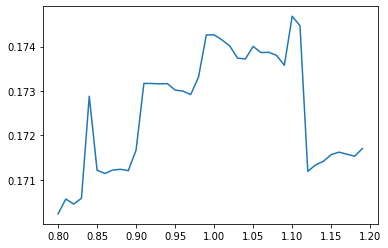

In [17]:
plt.plot(list(X.keys())[:], list(X.values())[:])
# plt.title("δMAP/δb\nbest BM25(b=0.96, k1=1.2, ε=0.25) = 18.21%")
# plt.xlabel("b")
# plt.ylabel("MAP")